# Arnold's Cat Map #
Arnold's cat map is a chatoic mapping, named after Vladimir Arnold, that has predictable behaviour at certain points. The map is generally used on images to show this predictable behaviour. The map is defined as:

$\Gamma : (x,y) \rightarrow (2x+y,x+y) \mod N $

Where N is the unit length of our image. From looking at this mapping, you can see that the point is basically just sheared two units right and one unit up. This new point may end up being outside of our unit length, so the $\mod N$ shoves the stretched image back into unit length. As long as the image is $ N x N$, this mapping preserves area!

In [1]:
using Images
using ImageView
using ImageIO
using FixedPointNumbers
using Plots
using Interact
using WebIO


WebIO._IJuliaInit()

## The Mapping (Without Modular) ##

Let's first look at the mapping without using the modular operator, so we can see exactly how the image is stretched.

In [2]:
function catmapstretch(img,newimg,s)
    img = reverse(img,dims = 1) #Reverse the image because julia indexing
    for n = 1:s[1]
       for k = 1:s[1]
    newimg[k+n,2*k+n] = img[n,k]
        end
    end
    newimg[:,:] =reverse(newimg,dims = 1) # Reverse the image back
end

catmapstretch (generic function with 1 method)

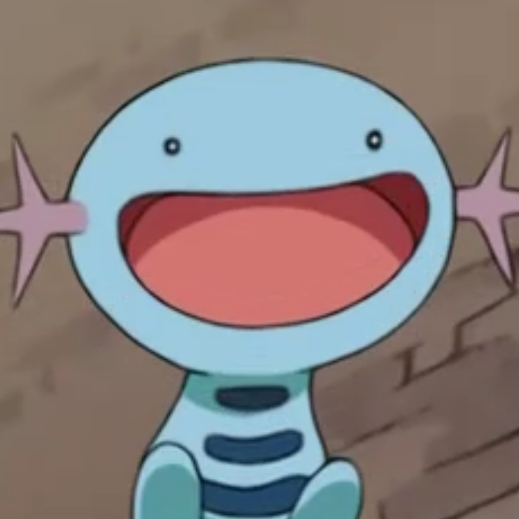

In [63]:
img = load("whooper.png")

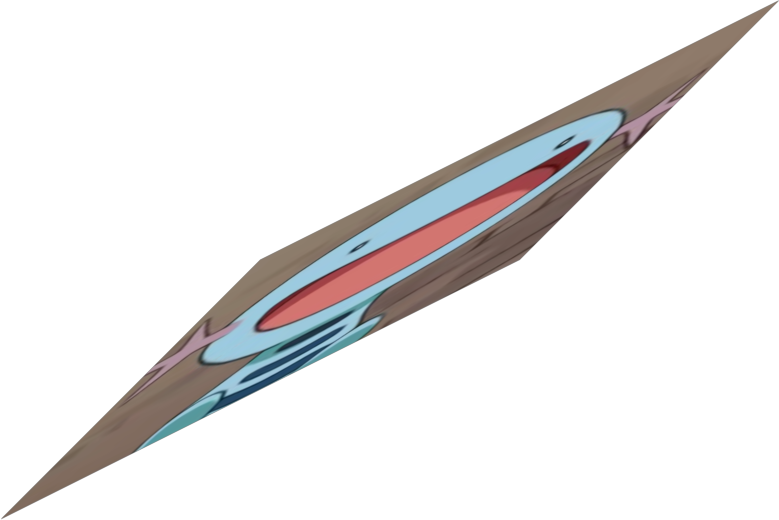

In [64]:
s = size(img)
newimg = Array{RGBA{N0f8}}(undef,2*s[1],2*s[1]+s[1])
catmapstretch(img,newimg,s)
newimg

## The Mapping (With Modular) ##

Recall that $(x,y)\mod N = (x\mod N, y\mod N)$ so we can do the modular operator on each index seperately.

In [65]:
function catmap(newimg,s)
    img = reverse(newimg,dims = 1) #Reverse the image because julia
    for n = 1:s[1]
       for k = 1:s[1] # Doing every pixel
    newimg[mod(k+n,s[1])+1,mod(2*k+n,s[1])+1] = img[n,k] #+1 to index at (1,1) not (0,0)
        end
    end
    newimg[:,:] =reverse(newimg,dims = 1) # Reverse the image back
end

catmap (generic function with 1 method)

## The Stepper ##

In [66]:
function docatmap(maxiter,newimg,maps,s)
    for j = 1:maxiter
        catmap(newimg,s)
        maps[j] = newimg[:,:]
    end
end

docatmap (generic function with 1 method)

## Map Test ##

In [74]:
img = load("cat.png")
s = size(img)
maxiter = 500
newimg = Array{RGBA{N0f8}}(undef,s)
maps = Matrix{Array{RGBA{N0f8}}}(undef,maxiter,1)
newimg[:,:] = img
docatmap(maxiter,newimg,maps,s)
@manipulate for iteration in 1:maxiter
    maps[iteration]
            end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["iteration"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 500, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{Observables.AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing), "index" => (Observable{Int64} with 2 listeners. Value:
250, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "C:\\Users\\nicks\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\nicks\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\nicks\\.julia\\packages\\InteractBase\\o1I6G\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\nicks\\.julia\\packages\\InteractBase\\o1I6G\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\nicks\\.julia\\packages\\Interact\\pVyN2\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x0000000019d85140, Task (runnable) @0x0000000019d85140), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"1\",\"2\",\"3\",\"4\",\"5\",\"6\",\"7\",\"8\",\"9\",\"10\",\"11\",\"12\",\"13\",\"14\",\"15\",\"16\",\"17\",\"18\",\"19\",\"20\",\"21\",\"22\",\"23\",\"24\",\"25\",\"26\",\"27\",\"28\",\"29\",\"30\",\"31

## Stripes ##

After a few iterations, stripes begin to appear.  These can be explained by the matrix notation of the mapping:

$\Gamma : \begin{bmatrix} x \\ y \end{bmatrix} \rightarrow \begin{bmatrix} 2 & 1 \\ 1 & 1 \end{bmatrix}
\begin{bmatrix} x \\ y \end{bmatrix} $

The eigenvectors of the mapping matrix come out to be:

$ \lambda_1  =\begin{bmatrix} .618034 \\ 1 \end{bmatrix} $

$ \lambda_2  =\begin{bmatrix} -1.618034 \\ 1 \end{bmatrix} $



## Period finder ##

It turns out that we can find periodic points in the mapping.  Because we're doing a finite discrete map, it makes sense that after a certain number of iterations a point will return to it's original location.

#### Limitations ####
We're working with image data, all julia stores is the color of the pixel and the location.  Two pixels of the same exact color may be in different locations, but if they were to end up in either of eachother's starting location, the period finder may through a false period.

In [69]:
function periodicat(img,maxiter,newimg,s,x,y)
    k = 0
    while k < maxiter
catmap(newimg,s)
        k +=1
        if newimg[x,y] == img[x,y] #If the pixel of the original image matches the new mapping, it has looped back
            println(k) #Period of pixel
            break
        elseif k>= maxiter
              println("No period found")
            break
        end
    end
end

periodicat (generic function with 1 method)

In [71]:
img = load("cat.png")
s = size(img)
newimg = Array{RGBA{N0f8}}(undef,s);
newimg[:,:] = img;
(x0,y0) = (2,2) #starting point
maxiter = 500
periodicat(img,maxiter,newimg,s,x0,y0)


348


## Finding the period of any size N ##

Now that we can find the period of our image, all we have to do is resize the image to size $N$ and we should be able to find the period of it.

104


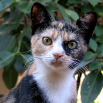

In [80]:
maxrez = 103
img_N = imresize(img, (maxrez, maxrez))
s = size(img_N)
maxiter = 1000
newimg = Array{RGBA{N0f8}}(undef,s)
newimg[:,:] = img_N
(x0,y0) = (2,2)
periodicat(img_N,maxiter,newimg,s,x0,y0)
newimg

### Range of periods ##

Since we can find the period of any map size $N$, let's go ahead and find the periods for the first few maps.  I think this is a big part of what makes the map chaotic.

In [10]:
function generalperiodicat(img,Parray,Nmax)
    for N = 2:Nmax
        img = imresize(img,(N,N))
        s = size(img)
        maxiter = 1000
        newimg = Array{RGBA{N0f8}}(undef,s)
        newimg[:,:] = img
        (x0,y0) = (2,2)
            k = 0
            while k < maxiter
                catmap(newimg,s)
                k +=1
                    if newimg[x0,y0] == img[x0,y0] #If the pixel of the original image matches the new mapping, it has looped back
                     #Period of pixel
                        break
                    elseif k>= maxiter
                      println("No period found")
                        break
                    end
            end
         Parray[N,1] = k
        Parray[N,2] = N
     end
end


generalperiodicat (generic function with 1 method)

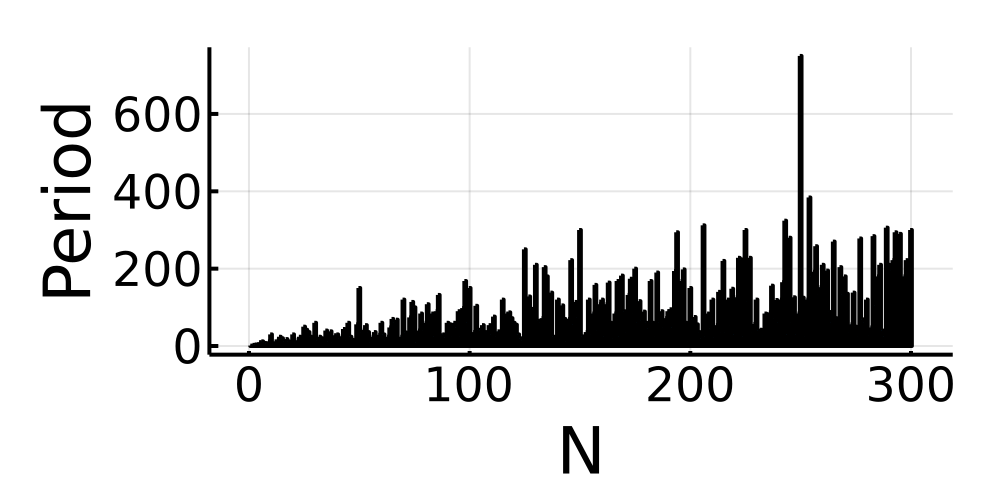

In [37]:
img = load("cat.png")
Nmax = 300
Parray = Array{Float64}(undef,Nmax,2)
Parray[:,1] = 1
generalperiodicat(img,Parray,Nmax)
bar(Parray[:,1], size = (250, 125), legend =false,ylabel = "Period",xlabel = "N")

## Period Analysis ##
The maximum number of points that a map has is $N^2$. While some points may be more periodic than others, the maximum period of a point cannot exceed $N^2$. This is because each point is mapped exactly to another point, there are no points that exist such that:

$\Gamma : (x,y) \rightarrow (x,y) \mod N $ (except for one)

It is pretty easy to understand that the maximum period of a map is at least the maximum period of any individual point of that map. For example, a map that has points with periods 3,6,9, and 18 will return to normal after 18 iterations.  The important part to note is that 18 is also the least common multiple of these numbers. If that map instead had points of period 3,6,9,and 19, the map would return to normal after 342 iterations, a big difference.

## Interesting Periods ##

Now that we can find the max period and we know there exists points with period less than the max, let's take a look at what's happening at these points.

In [91]:
img = load("cat.png")
maxrez = 350
img = imresize(img, (maxrez, maxrez))
s = size(img)
maxiter =500
newimg = Array{RGBA{N0f8}}(undef,s)
maps = Matrix{Array{RGBA{N0f8}}}(undef,maxiter,1)
newimg[:,:] = img
docatmap(maxiter,newimg,maps,s)
@manipulate for Iteration in 1:maxiter
    maps[Iteration]
            end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["Iteration"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 500, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{Observables.AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing), "index" => (Observable{Int64} with 2 listeners. Value:
250, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "C:\\Users\\nicks\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\nicks\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\nicks\\.julia\\packages\\InteractBase\\o1I6G\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\nicks\\.julia\\packages\\InteractBase\\o1I6G\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\nicks\\.julia\\packages\\Interact\\pVyN2\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x0000000019d85dc0, Task (runnable) @0x0000000019d85dc0), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"1\",\"2\",\"3\",\"4\",\"5\",\"6\",\"7\",\"8\",\"9\",\"10\",\"11\",\"12\",\"13\",\"14\",\"15\",\"16\",\"17\",\"18\",\"19\",\"20\",\"21\",\"22\",\"23\",\"24\",\"25\",\"26\",\"27\",\"28\",\"29\",\"30\",\"31

## Ghost Image ##
The ghost image is the only one I think I can explain. Consider a map of length $N$, where $N$ is divisible by 2 and $N$ is fairly large.  Then the map $N/2$ exist within this map.  This means that every other point is also going to be part of this $N/2$ map. We can then find the max period of this $N/2$ map to find the "ghost period" of the $N$ map.

## Duplication ##

After a few iterations of the mapping, it tends to create a map where the original image is duplicated a few hundred times. (350)

## Grids ##

Similar to the ghost image, there appears to be certain periods that create matching grids. (500 -> 375)

## Overlays ##

Certain periods appear to overlay the original image diagonally. (500 -> 450)

## Upside down ##

Sometimes the image is reconstructed upside down! (103 ->52)